# Team Assignment Using Colours of Jersey with K-Means Clustering

### Importing Package

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

### Specifying The Path

In [2]:
image_path = "../output_videos/cropped_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)#doing RGB Analysis

### Opening Image

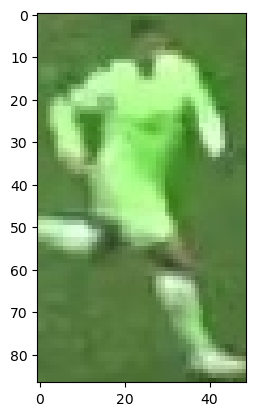

In [3]:
plt.imshow(image)
plt.show()

### Extracting Top Half Of Image

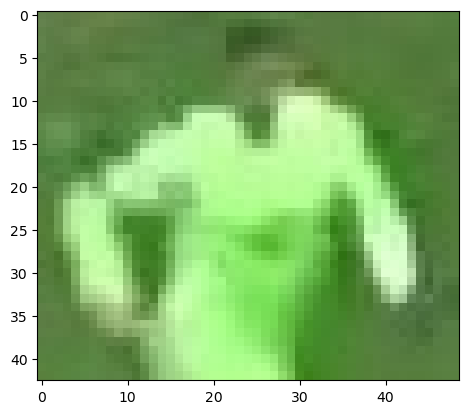

In [4]:
top_half_image = image[0: int(image.shape[0]/2), :]#Taking whole height divded by 2 and whole x axis
plt.imshow(top_half_image)
plt.show()

### Dividing the Imagine Into Two Clusters

/Users/adityamishra/tensorflow-test/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


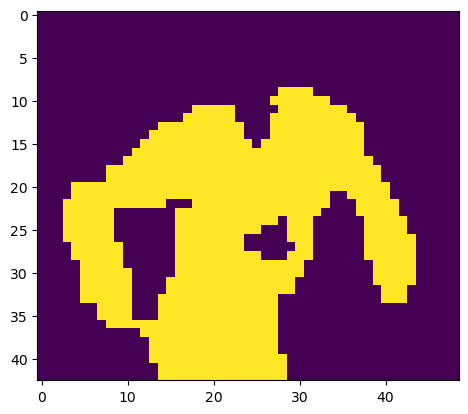

In [5]:
#Reshaping the image into the 2d Array
"""
This represents the number of color channels in the image. Most color images use the RGB (Red, Green, Blue) color model, where each pixel is represented by three values - one for each color channel. So, the 3 here ensures that each row in the reshaped array will contain these three values for each pixel.


In NumPy's reshape function, -1 is a special value that tells NumPy to automatically calculate the size of that dimension. It essentially means "make this dimension as large as it needs to be to fit all the data."

Therefore, reshape(-1, 3) is saying:
Make the array have 2 dimensions
Make the second dimension have a size of 3 (for the three color channels)
Automatically calculate how many rows are needed to fit all the pixel data (this will be the total number of pixels in the image)
"""
image_2d = top_half_image.reshape(-1,3)

# Performing K-means clustering with 2 clusters
# The random_state=0 ensures reproducibility
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

# Getting the cluster labels
labels = kmeans.labels_

# Reshaping the labels into the orginal image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# Displaying the clustered image
plt.imshow(clustered_image)
plt.show()

### Analysing Corner of Clustered Image

The logic behind this is based on the assumption that in many images, especially those of players or objects against a background, the corners of the image are more likely to be background. By identifying which cluster is most common in the corners, we're making an educated guess about which cluster represents the background or non-player elements.

In [6]:
"""
Following line contains the cluster values of the four corners of the clustered_image.

clustered_image[0, 0]: Top-left corner
clustered_image[0, -1]: Top-right corner
clustered_image[-1, 0]: Bottom-left corner
clustered_image[-1, -1]: Bottom-right corner, Here, -1 as an index refers to the last element in that dimension.

"""
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1],clustered_image[-1, 0], clustered_image[-1, -1]]

"""
Following line determines which cluster is most common in the corners. 

set(corner_clusters): Creates a set of unique cluster values found in the corners.
max(..., key=corner_clusters.count): Finds the cluster value that appears most frequently in corner_clusters.
"""
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)

print(non_player_cluster)

0


In [9]:
"""
Since there are only two clusters (0 and 1), this line determines the player cluster by subtracting the non-player cluster from 1. If the background is cluster 0, the player will be cluster 1, and vice versa.
"""
player_cluster = 1-non_player_cluster
print(player_cluster)

1


In [10]:
kmeans.cluster_centers_[player_cluster]

array([170.54183267, 235.90571049, 142.44488712])